In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import permutation_test, ttest_1samp, bootstrap
from statsmodels.regression.linear_model import OLS
df = pd.read_excel('../data/processed/melted_df_excel_paired_ALL.xlsx')
df

,paper_id,model_id,apa_citation,year,N,output_arousal,accuracy_arousal,output_valence,accuracy_valence,ML_model
0,20,130-1,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...",2016,24,"HA, LA",55.94,"HV, LV",54.73,class_Support Vector Machine (SVM) Lineal
1,20,130-2,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...",2016,24,"HA, LA",53.14,"HV, LV",55.78,class_Support Vector Machine (SVM) Polynomial
2,20,130-3,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...",2016,24,"HA, LA",62.23,"HV, LV",50.52,class_Support Vector Machine (SVM) Gaussian
3,23,147-1,"Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...",2016,32,"HA, LA",70.78,"HV, LV",69.60,class_Tree based models 10x63 No -Conv
4,23,147-2,"Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...",2016,32,"HA, LA",71.53,"HV, LV",70.54,class_Tree based models 10x21 No -Conv
...,...,...,...,...,...,...,...,...,...,...
71,97,492-4,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...",2020,32,"HA, LA",65.63,"HV, LV",59.38,MSCNN 2 60
72,97,492-5,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...",2020,32,"HA, LA",65.63,"HV, LV",50.00,MSCNN 3 30
73,97,492-6,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...",2020,32,"HA, LA",68.75,"HV, LV",59.38,MSCNN 3 60
74,97,492-7,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...",2020,32,"HA, LA",59.38,"HV, LV",31.25,CNN 30


In [33]:
df_metadata = pd.read_csv('../data/cleaned/Normalized Table - Metadata.csv')
df_data_type = pd.read_csv('../data/cleaned/Normalized Table - Data type.csv')
df_participants = pd.read_csv('../data/cleaned/Normalized Table - Participants.csv')
df_self_report = pd.read_csv('../data/cleaned/Normalized Table - Self-report.csv')
df_emotion_elicitation_techniques = pd.read_csv('../data/cleaned/Normalized Table - Emotion elicitation techniques.csv')

In [34]:
# Deduplicar los DataFrames complementarios en base a 'paper_id'
df_metadata = df_metadata.drop_duplicates(subset=['paper_id'])
df_data_type = df_data_type.drop_duplicates(subset=['paper_id'])
df_participants = df_participants.drop_duplicates(subset=['paper_id'])
df_self_report = df_self_report.drop_duplicates(subset=['paper_id'])
df_emotion_elicitation_techniques = df_emotion_elicitation_techniques.drop_duplicates(subset=['paper_id'])

# Eliminar las columnas 'model_id' y 'apa_citation' (por si existen)
df_metadata = df_metadata.drop(columns=['model_id', 'apa_citation'], errors='ignore')
df_data_type = df_data_type.drop(columns=['model_id', 'apa_citation'], errors='ignore')
df_participants = df_participants.drop(columns=['model_id', 'apa_citation'], errors='ignore')
df_self_report = df_self_report.drop(columns=['model_id', 'apa_citation'], errors='ignore')
df_emotion_elicitation_techniques = df_emotion_elicitation_techniques.drop(columns=['model_id', 'apa_citation'], errors='ignore')

# Realizar los merges sucesivos utilizando 'paper_id' como clave
df = df.merge(df_metadata, on='paper_id', how='left')
df = df.merge(df_data_type, on='paper_id', how='left')
df = df.merge(df_participants, on='paper_id', how='left')
df = df.merge(df_self_report, on='paper_id', how='left')
df = df.merge(df_emotion_elicitation_techniques, on='paper_id', how='left')

# Verificar el resultado final
print(f"Cantidad de filas final: {len(df)}")
df.head()



Cantidad de filas final: 76


,paper_id,model_id,apa_citation,year_x,N,output_arousal,accuracy_arousal,output_valence,accuracy_valence,ML_model,...,technique_clasif_reading,technique_clasif_ux,technique_clasif_tactile_enhanced_multimedia_clips,technique_clasif_videogame,technique_clasif_puzzle,technique_description,elicitation_duration,elicitation_duration_range,elicitation_duration_mean,elicitation_duration_median
0,20,130-1,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...",2016,24,"HA, LA",55.94,"HV, LV",54.73,class_Support Vector Machine (SVM) Lineal,...,-,-,-,-,-,NaN,-,34.9s - 117 s,"81,4 s",-
1,20,130-2,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...",2016,24,"HA, LA",53.14,"HV, LV",55.78,class_Support Vector Machine (SVM) Polynomial,...,-,-,-,-,-,NaN,-,34.9s - 117 s,"81,4 s",-
2,20,130-3,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...",2016,24,"HA, LA",62.23,"HV, LV",50.52,class_Support Vector Machine (SVM) Gaussian,...,-,-,-,-,-,NaN,-,34.9s - 117 s,"81,4 s",-
3,23,147-1,"Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...",2016,32,"HA, LA",70.78,"HV, LV",69.60,class_Tree based models 10x63 No -Conv,...,-,-,-,-,-,NaN,1m,-,-,-
4,23,147-2,"Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...",2016,32,"HA, LA",71.53,"HV, LV",70.54,class_Tree based models 10x21 No -Conv,...,-,-,-,-,-,NaN,1m,-,-,-


In [35]:
df

,paper_id,model_id,apa_citation,year_x,N,output_arousal,accuracy_arousal,output_valence,accuracy_valence,ML_model,...,technique_clasif_reading,technique_clasif_ux,technique_clasif_tactile_enhanced_multimedia_clips,technique_clasif_videogame,technique_clasif_puzzle,technique_description,elicitation_duration,elicitation_duration_range,elicitation_duration_mean,elicitation_duration_median
0,20,130-1,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...",2016,24,"HA, LA",55.94,"HV, LV",54.73,class_Support Vector Machine (SVM) Lineal,...,-,-,-,-,-,NaN,-,34.9s - 117 s,"81,4 s",-
1,20,130-2,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...",2016,24,"HA, LA",53.14,"HV, LV",55.78,class_Support Vector Machine (SVM) Polynomial,...,-,-,-,-,-,NaN,-,34.9s - 117 s,"81,4 s",-
2,20,130-3,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...",2016,24,"HA, LA",62.23,"HV, LV",50.52,class_Support Vector Machine (SVM) Gaussian,...,-,-,-,-,-,NaN,-,34.9s - 117 s,"81,4 s",-
3,23,147-1,"Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...",2016,32,"HA, LA",70.78,"HV, LV",69.60,class_Tree based models 10x63 No -Conv,...,-,-,-,-,-,NaN,1m,-,-,-
4,23,147-2,"Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...",2016,32,"HA, LA",71.53,"HV, LV",70.54,class_Tree based models 10x21 No -Conv,...,-,-,-,-,-,NaN,1m,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,97,492-4,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...",2020,32,"HA, LA",65.63,"HV, LV",59.38,MSCNN 2 60,...,-,-,-,-,-,NaN,1m,-,-,-
72,97,492-5,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...",2020,32,"HA, LA",65.63,"HV, LV",50.00,MSCNN 3 30,...,-,-,-,-,-,NaN,1m,-,-,-
73,97,492-6,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...",2020,32,"HA, LA",68.75,"HV, LV",59.38,MSCNN 3 60,...,-,-,-,-,-,NaN,1m,-,-,-
74,97,492-7,"Ganapathy, N., & Swaminathan, R. (2019). Emoti...",2020,32,"HA, LA",59.38,"HV, LV",31.25,CNN 30,...,-,-,-,-,-,NaN,1m,-,-,-


In [36]:
# Guardar el DataFrame resultante en un archivo Excel
output_path = '../data/processed/melted_df_explore.xlsx'
df.to_excel(output_path, index=False)

print(f"Archivo guardado exitosamente en: {output_path}")



Archivo guardado exitosamente en: ../data/processed/melted_df_explore.xlsx


In [41]:
# Lista de columnas potencialmente relevantes
relevant_columns = [
    'paper_id',
    'model_id',
    'apa_citation',
    'year',
    'N',
    'source_type_conference',
    'first_author_country_affiliation',
    'deap',
    'amigos',
    'mahnob',
    'pmemo',
    'accuracy_arousal',
    'accuracy_valence'
]

# Subset del DataFrame resultante
df_subset = df[relevant_columns]

df_subset['mean_accuracy'] = (df['accuracy_arousal'] + df['accuracy_valence']) / 2
df_subset['diff_accuracy'] = df['accuracy_arousal'] - df['accuracy_valence']

# Guardar el subset en un archivo Excel
output_path_subset = '../data/processed/melted_df_explore_subset.xlsx'
df_subset.to_excel(output_path_subset, index=False)

print(f"Subset guardado exitosamente en: {output_path_subset}")


Subset guardado exitosamente en: ../data/processed/melted_df_explore_subset.xlsx


C:\Users\dameliotomas\AppData\Local\Temp\ipykernel_36028\3604183600.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['mean_accuracy'] = (df['accuracy_arousal'] + df['accuracy_valence']) / 2
C:\Users\dameliotomas\AppData\Local\Temp\ipykernel_36028\3604183600.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['diff_accuracy'] = df['accuracy_arousal'] - df['accuracy_valence']


In [ ]:
# Deduplicar los DataFrames complementarios en base a 'paper_id'
df_metadata = df_metadata.drop_duplicates(subset=['paper_id'])
df_data_type = df_data_type.drop_duplicates(subset=['paper_id'])
df_participants = df_participants.drop_duplicates(subset=['paper_id'])
df_self_report = df_self_report.drop_duplicates(subset=['paper_id'])
df_emotion_elicitation_techniques = df_emotion_elicitation_techniques.drop_duplicates(subset=['paper_id'])

# Eliminar las columnas 'model_id' y 'apa_citation' (por si existen)
df_metadata = df_metadata.drop(columns=['model_id', 'apa_citation'], errors='ignore')
df_data_type = df_data_type.drop(columns=['model_id', 'apa_citation'], errors='ignore')
df_participants = df_participants.drop(columns=['model_id', 'apa_citation'], errors='ignore')
df_self_report = df_self_report.drop(columns=['model_id', 'apa_citation'], errors='ignore')
df_emotion_elicitation_techniques = df_emotion_elicitation_techniques.drop(columns=['model_id', 'apa_citation'], errors='ignore')

# Realizar los merges sucesivos utilizando 'paper_id' como clave
df = df.merge(df_metadata, on='paper_id', how='left')
df = df.merge(df_data_type, on='paper_id', how='left')
df = df.merge(df_participants, on='paper_id', how='left')
df = df.merge(df_self_report, on='paper_id', how='left')
df = df.merge(df_emotion_elicitation_techniques, on='paper_id', how='left')

# Verificar el resultado final
print(f"Cantidad de filas final: {len(df)}")
df.head()



Cantidad de filas final: 76


,paper_id,model_id,apa_citation,year_x,N,output_arousal,accuracy_arousal,output_valence,accuracy_valence,ML_model,...,technique_clasif_reading,technique_clasif_ux,technique_clasif_tactile_enhanced_multimedia_clips,technique_clasif_videogame,technique_clasif_puzzle,technique_description,elicitation_duration,elicitation_duration_range,elicitation_duration_mean,elicitation_duration_median
0,20,130-1,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...",2016,24,"HA, LA",55.94,"HV, LV",54.73,class_Support Vector Machine (SVM) Lineal,...,-,-,-,-,-,NaN,-,34.9s - 117 s,"81,4 s",-
1,20,130-2,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...",2016,24,"HA, LA",53.14,"HV, LV",55.78,class_Support Vector Machine (SVM) Polynomial,...,-,-,-,-,-,NaN,-,34.9s - 117 s,"81,4 s",-
2,20,130-3,"Wiem, M. B. H., & Lachiri, Z. (2017). Emotion ...",2016,24,"HA, LA",62.23,"HV, LV",50.52,class_Support Vector Machine (SVM) Gaussian,...,-,-,-,-,-,NaN,-,34.9s - 117 s,"81,4 s",-
3,23,147-1,"Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...",2016,32,"HA, LA",70.78,"HV, LV",69.60,class_Tree based models 10x63 No -Conv,...,-,-,-,-,-,NaN,1m,-,-,-
4,23,147-2,"Ayata, D., Yaslan, Y., & Kamasak, M. (2017). E...",2016,32,"HA, LA",71.53,"HV, LV",70.54,class_Tree based models 10x21 No -Conv,...,-,-,-,-,-,NaN,1m,-,-,-


In [2]:
paper_id_to_citation = {
    20: "Wiem & Lachiri, 2017",
    23: "Ayata et al., 2017",
    32: "Siddharth et al., 2018",
    38: "Ayata et al., 2017",
    63: "Sharma et al., 2019",
    66: "Ganapathy et al., 2020",
    74: "Chang et al., 2019",
    82: "Santamaria-Granados et al., 2018",
    86: "Ganapathy & Swaminathan, 2020",
    91: "Susanto et al., 2020",
    94: "Yin et al., 2019",
    97: "Ganapathy & Swaminathan, 2019"
}


In [5]:
df['diff_acc'] = df['accuracy_arousal'] - df['accuracy_valence']

df['mean_acc'] = np.mean([df['accuracy_arousal'], df['accuracy_valence']], axis=0)

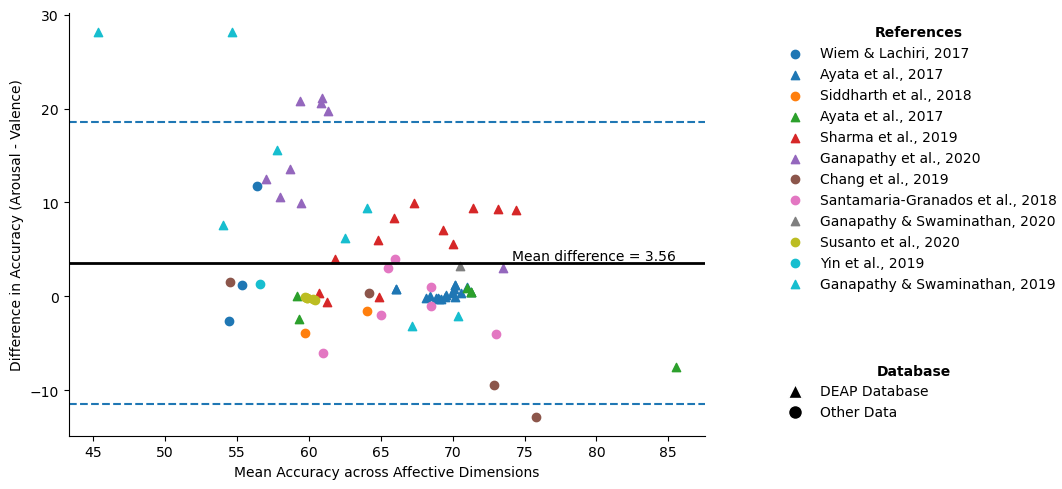

In [31]:
from scipy.stats import linregress  # Add this line
import seaborn as sns

# Unique paper IDs
unique_paper_ids = df['paper_id'].unique()

# Create a color map for paper IDs
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_paper_ids)))

plt.figure(figsize=(15, 5))

# Calculate the mean difference in accuracy
mean_diff_acc = np.mean(df['diff_acc'])

# Add a horizontal line to represent the mean difference in accuracy
plt.axhline(mean_diff_acc, color='black', linestyle='-', linewidth=2)

# Add text to indicate the mean value
plt.text(max(df['mean_acc']) * 1, mean_diff_acc, f'Mean difference = {mean_diff_acc:.2f}', verticalalignment='bottom', horizontalalignment='right')


# Calculate the correlation coefficient and p-value
slope, intercept, r_value, p_value, std_err = linregress(df['mean_acc'], df['diff_acc'])

for i, paper_id in enumerate(unique_paper_ids):
    subset = df[df['paper_id'] == paper_id]
    
    # Check if N == 32 for the subset
    is_N_32 = subset['N'] == 32
    
    # Get the citation for the paper ID
    citation = paper_id_to_citation.get(paper_id, f"Paper ID {paper_id}")
    
    # Plot points with N == 32 using triangles
    if any(is_N_32):
        plt.scatter(subset['mean_acc'][is_N_32], subset['diff_acc'][is_N_32], 
                    color=colors[i], marker='^', label=f"{citation}")
    
    # Plot other points using circles
    if any(~is_N_32):
        plt.scatter(subset['mean_acc'][~is_N_32], subset['diff_acc'][~is_N_32], 
                    color=colors[i], label=citation)

# Adding horizontal lines
plt.axhline(np.mean(df['diff_acc']) + 1.96 * np.std(df['diff_acc']), linestyle='--')
plt.axhline(np.mean(df['diff_acc']) - 1.96 * np.std(df['diff_acc']), linestyle='--')

# Adding labels and title
plt.xlabel('Mean Accuracy across Affective Dimensions')
plt.ylabel('Difference in Accuracy (Arousal - Valence)')
#plt.title('Mean vs Difference in Arousal and Valence Accuracy', fontweight='bold')

# Adding legend
legend1 = plt.legend(title='References',  bbox_to_anchor=(1.1, 1), loc='upper left', frameon=False, fancybox=True)
plt.gca().add_artist(legend1)
plt.setp(legend1.get_title(), weight='bold')

# Adding a second legend for marker types
legend2 = plt.legend([plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='black', markersize=10),
                      plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10)],
                     ['DEAP Database                           ',
                       'Other Data                             '],
                       title='Database', bbox_to_anchor=(1.1, 0.2), loc='upper left',
                      frameon=False, fancybox=True)
plt.setp(legend2.get_title(), weight='bold')


plt.tight_layout(rect=[0, 0, 0.75, 1])

sns.despine()

# Show the plot
plt.show()

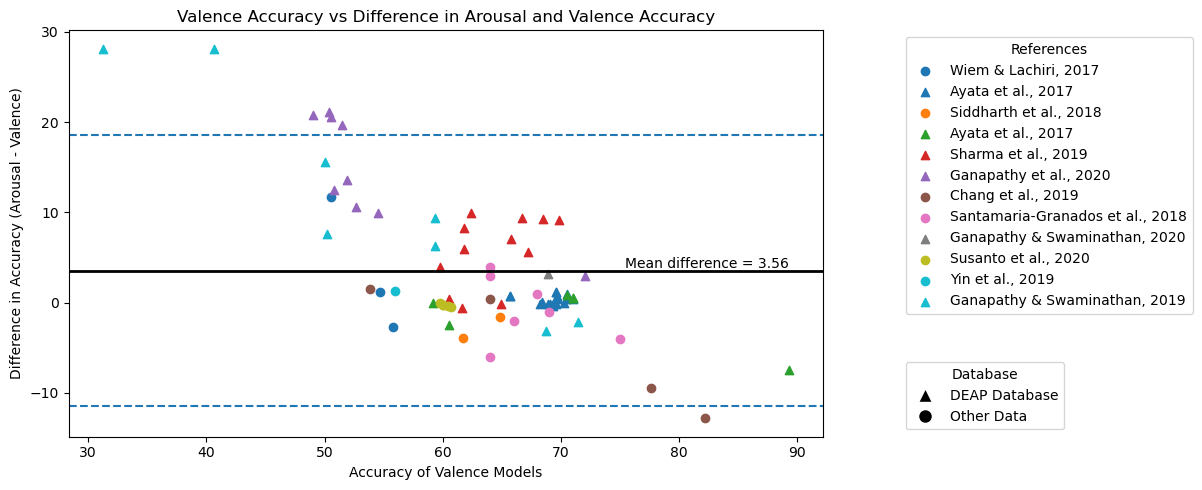

In [18]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration (replace with your actual DataFrame)
# import pandas as pd
# df = pd.DataFrame({
#     'paper_id': [...],
#     'N': [...],
#     'accuracy_arousal': [...],
#     'accuracy_valence': [...]
# })

# Calculate the difference in accuracy
df['diff_acc'] = df['accuracy_arousal'] - df['accuracy_valence']

# Unique paper IDs
unique_paper_ids = df['paper_id'].unique()

# Create a color map for paper IDs
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_paper_ids)))

plt.figure(figsize=(15, 5))

# Calculate the mean difference in accuracy
mean_diff_acc = np.mean(df['diff_acc'])

# Add a horizontal line to represent the mean difference in accuracy
plt.axhline(mean_diff_acc, color='black', linestyle='-', linewidth=2)

# Add text to indicate the mean value
plt.text(max(df['accuracy_valence']) * 1, mean_diff_acc, f'Mean difference = {mean_diff_acc:.2f}', verticalalignment='bottom', horizontalalignment='right')

# Calculate the correlation coefficient and p-value
slope, intercept, r_value, p_value, std_err = linregress(df['accuracy_valence'], df['diff_acc'])

for i, paper_id in enumerate(unique_paper_ids):
    subset = df[df['paper_id'] == paper_id]
    
    # Check if N == 32 for the subset
    is_N_32 = subset['N'] == 32
    
    # Get the citation for the paper ID
    citation = paper_id_to_citation.get(paper_id, f"Paper ID {paper_id}")
    
    # Plot points with N == 32 using triangles
    if any(is_N_32):
        plt.scatter(subset['accuracy_valence'][is_N_32], subset['diff_acc'][is_N_32], 
                    color=colors[i], marker='^', label=f"{citation}")
    
    # Plot other points using circles
    if any(~is_N_32):
        plt.scatter(subset['accuracy_valence'][~is_N_32], subset['diff_acc'][~is_N_32], 
                    color=colors[i], label=citation)

# Adding horizontal lines
plt.axhline(np.mean(df['diff_acc']) + 1.96 * np.std(df['diff_acc']), linestyle='--')
plt.axhline(np.mean(df['diff_acc']) - 1.96 * np.std(df['diff_acc']), linestyle='--')

# Adding labels and title
plt.xlabel('Accuracy of Valence Models')
plt.ylabel('Difference in Accuracy (Arousal - Valence)')
plt.title('Valence Accuracy vs Difference in Arousal and Valence Accuracy')

# Adding legend
legend1 = plt.legend(title='References',  bbox_to_anchor=(1.1, 1), loc='upper left')
plt.gca().add_artist(legend1)

# Adding a second legend for marker types
legend2 = plt.legend([plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='black', markersize=10),
                      plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10)],
                     ['DEAP Database', 'Other Data'], title='Database', bbox_to_anchor=(1.1, 0.2), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.75, 1])

# Show the plot
plt.show()


In [13]:
x = df['diff_acc']

In [14]:
x

0      1.21
1     -2.64
2     11.71
3      1.18
4      0.99
      ...  
71     6.25
72    15.63
73     9.37
74    28.13
75    28.12
Name: diff_acc, Length: 76, dtype: float64

In [15]:
np.mean(x)

3.5598684210526317

In [128]:
def my_stat(x):
    return ttest_1samp(x, popmean=0).statistic

In [129]:
permutation_test((x.values,), my_stat, permutation_type='samples')

PermutationTestResult(statistic=4.027865272800383, pvalue=0.0002, null_distribution=array([-1.80111763,  0.84758803,  1.29154553, ...,  0.80215967,
        1.95122163, -0.93261297]))

In [130]:
bootstrap((x.values,), my_stat)

BootstrapResult(confidence_interval=ConfidenceInterval(low=2.295703840182147, high=5.469281611057786), bootstrap_distribution=array([4.08922675, 3.36839602, 2.89877358, ..., 3.79385713, 3.51703206,
       4.05185213]), standard_error=0.8012287945010852)

In [131]:
X = df[['N', 'year', 'mean_acc']]
X = sm.add_constant(X)


In [132]:
y = df['diff_acc']

In [133]:
model = OLS(y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               diff_acc   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     17.10
Date:                Wed, 11 Oct 2023   Prob (F-statistic):           1.74e-08
Time:                        01:40:56   Log-Likelihood:                -242.07
No. Observations:                  76   AIC:                             492.1
Df Residuals:                      72   BIC:                             501.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3342.7244    945.116     -3.537      0.001   -5226.779   -1458.670
N             -0.0240      0.006     -3.759      0.000      -0.037      -0.011
year           1.6757      0.467      3.587      0.001       0.744       2.607
mean_acc      -0.5258      0.115     -4.575      0.000      -0.755      -0.297
==============================================================================
Omnibus:                        0.180   Durbin-Watson:                   0.852
Prob(Omnibus):                  0.914   Jarque-Bera (JB):                0.005
Skew:                          -0.011   Prob(JB):                        0.998
Kurtosis:                       3.033   Cond. No.                     2.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
rlm_mod = sm.RLM(y, X, M=sm.robust.norms.HuberT())
rlm_res = rlm_mod.fit()
rlm_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               diff_acc   No. Observations:                   76
Model:                            RLM   Df Residuals:                       72
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 11 Oct 2023                                         
Time:                        01:41:39                                         
No. Iterations:                    25                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2924.1686    896.892     -3.260      0.001   -4682.044   -1166.293
N             -0.0206      0.006     -3.409      0.001      -0.032      -0.009
year           1.4641      0.443      3.303      0.001       0.595       2.333
mean_acc      -0.4013      0.109     -3.680      0.000      -0.615      -0.188
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""